# Statistical Data Management Session 2: Visualisation and Numerical Characteristics of Quantitative Data (chapter 2 in McClave & Sincich)

## Data Set

We use data from STATBEL on the number of households and the number of cars in Belgian communities in 2019 (STATBEL. 2019. "Number of cars by Statistical sector". https://statbel.fgov.be/en/open-data/number-cars-statistical-sector). Run the following cell and inspect the resulting dataframe by adding a print statement. 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

conn = sqlite3.connect("../../shared/statbel.db")
df = pd.read_sql_query("SELECT TX_REFNIS_DESCR_NL AS community, SUM(MS_NUM_HH) AS households, SUM(MS_NUM_CAR) AS cars from tf_car_hh_sector GROUP BY TX_REFNIS_DESCR_NL", conn)

Use the documentation of a Pandas Dataframe (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and last week's solution to answer the following questions. 

1. How many communities are listed?
2. How many cars and households are listed in Brussels ("Brussel" in Dutch)?
3. What is the minimum number of households and in which community do they live?
4. What is the maximum number of cars and in which community are they listed?
5. What is the total number of households and cars in Belgium?
6. Where is the ratio "cars to households" largest? Hint: define a new column.

In [2]:
print("1.")
print(df.count())
print("------------------------------------------------------------")

print("2.")
print(df[ df['community']=='Brussel' ])
print("------------------------------------------------------------")

print("3.")
print(df['households'].min()) # only gives number, not community
# therefore, select those rows where households is equal to minimum 
# (could have been more than one!)
print(df[ df['households'] == df['households'].min() ]) 
print("------------------------------------------------------------")

print("4.")
print(df['cars'].max()) 
print(df[ df['cars'] == df['cars'].max() ])
print("------------------------------------------------------------")

print("5.")
print(df[['households','cars']].sum())
print("------------------------------------------------------------")

print("6.")
df['ratio'] = df['cars'] / df['households']
print(df[ df['ratio']==df['ratio'].max() ])
print("------------------------------------------------------------")

1.
community     581
households    581
cars          581
dtype: int64
------------------------------------------------------------
2.
   community  households   cars
86   Brussel       85368  41234
------------------------------------------------------------
3.
34
     community  households  cars
229  Herstappe          34    47
------------------------------------------------------------
4.
174436
    community  households    cars
19  Antwerpen      236418  174436
------------------------------------------------------------
5.
households    4955225
cars          5310848
dtype: int64
------------------------------------------------------------
6.
    community  households  cars     ratio
299     Lasne        5441  9342  1.716964
------------------------------------------------------------


## Plots

1. Make a **histogram** for the number of cars. As you can see from the documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), only the data are needed. Change the histogram to only include communities with less than 50 000 cars. Change the number of bins. Remember that (more or less) the square root of the number of data is considered to be a good value for the number of categories. Change the colour to red.

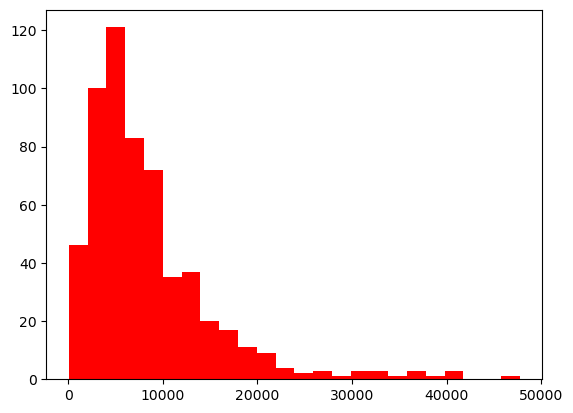

In [3]:
plt.hist(df[ df['cars'] < 50000 ]['cars'], bins='sqrt', color='red')
plt.show()
plt.close()

2. Make a **boxplot** of the number of households. Find the documentation online.

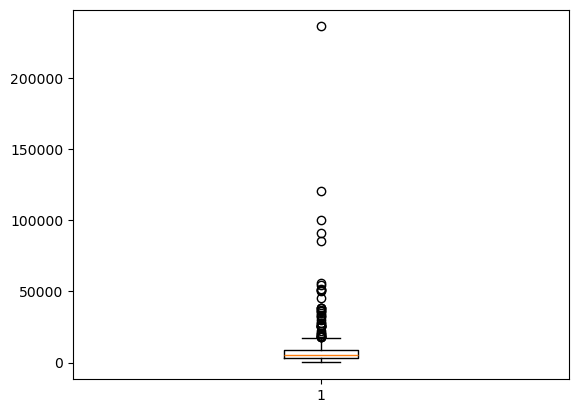

In [4]:
plt.boxplot(df['households'])
plt.show()
plt.close()

3. Make a new boxplot that is oriented horizontally. Don't show the outliers. Interpret the elements of the box plot, what do they represent?

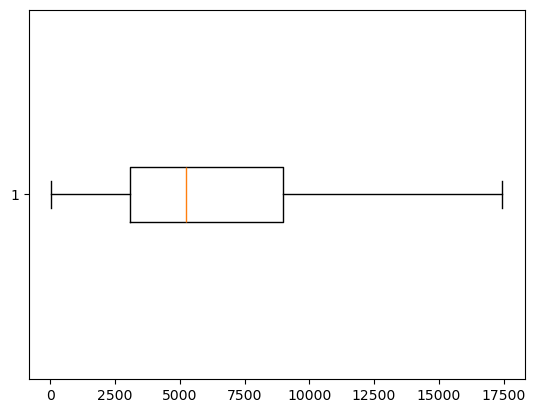

In [5]:
plt.boxplot(df['households'], vert=False, showfliers=False)
plt.show()
plt.close()

# note that the documentation states as an optional parameter:
# orientation = 'vertical'
# but the JupyterHub runs on a previous (depricated) version
# don't worry about this ;)

4. Make a **scatter plot** of the number of households (x-axis) vs. the number of cars (y-axis). Find the documentation online.

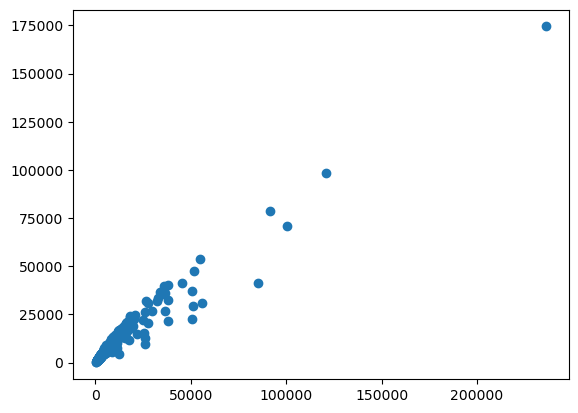

In [6]:
plt.scatter(df['households'], df['cars'])
plt.show()
plt.close()

5. The data are distorted by a couple of very populous communities. As a first try to delete the outliers, make a new scatter plot with only a portion of the communities, namely those smaller than a certain number (choose an appropriate value yourself) of households. Make the scatter plot larger and toy around with the options. Provide a title and axis labels.

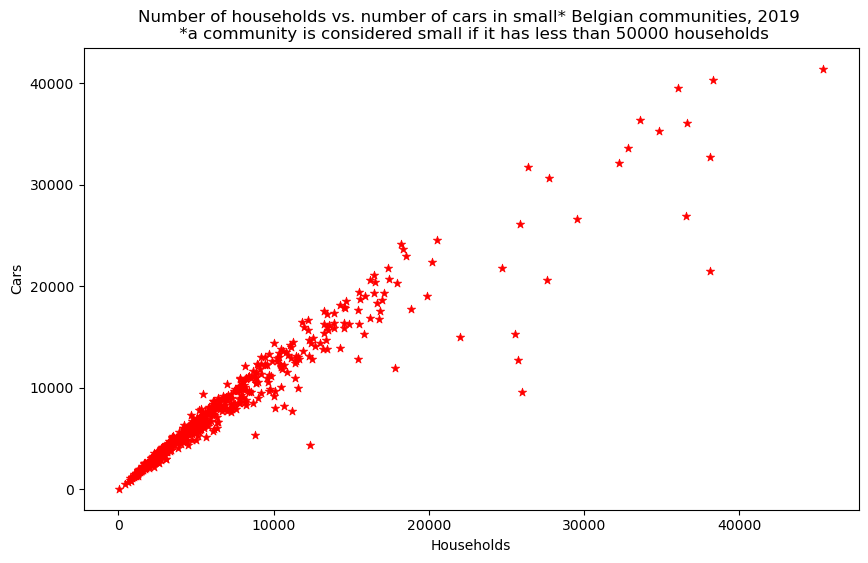

In [7]:
small_criterion = 50000
df_small_communities = df[df['households'] < small_criterion]
plt.figure(figsize=(10,6))
plt.scatter(df_small_communities['households'],df_small_communities['cars'], marker='*', c='r', s=40, linewidths=0.5)
plt.xlabel("Households")
plt.ylabel("Cars")
plt.title("Number of households vs. number of cars in small* Belgian communities, 2019 \n *a community is considered small if it has less than "+str(small_criterion)+ " households")
plt.show()
plt.close()

## Numerical Measures

We now calculate some numerical values. Look at the documentation of a *pandas dataframe* to see which methods are applicable to it.

1. Mean number of cars in Belgian communities.
2. Median number of cars in Belgian communities. Based on this: are the data skewed?
3. 50%-quantile of number of cars in Belgian communities. What do you notice?

In [8]:
print('1.', df['cars'].mean())
print('2.', df['cars'].median())
print('3.', df['cars'].quantile(q=0.5))

1. 9140.874354561101
2. 6535.0
3. 6535.0


4. Standard deviation of number of households in Belgian communities.
5. Variance of number of households in Belgian communities. What is the relation of this number with 4.?
6. 25%-quantile of both households and cars. You can select multiple columns with `df[<list_of_columns>]` and apply the method to both at the same time!

In [9]:
print('4.', df['households'].std())
print('5.', df['households'].var())
print('6.', df[['households','cars']].quantile(0.25))

4. 14509.000055229408
5. 210511082.60264695
6. households    3080.0
cars          4017.0
Name: 0.25, dtype: float64


7. Get an overview of statistics using `df.describe()`

In [10]:
df.describe()

,households,cars,ratio
count,581.000000,581.000000,581.000000
mean,8528.786575,9140.874355,1.223244
std,14509.000055,11267.888000,0.177520
min,34.000000,47.000000,0.355699
25%,3080.000000,4017.000000,1.143230
50%,5240.000000,6535.000000,1.261073
75%,8974.000000,10611.000000,1.332008
max,236418.000000,174436.000000,1.716964


8. Calculate the z-score of the number of cars in Charleroi.

In [11]:
def z_score(value, dataframe):
    mean = dataframe.mean()
    std = dataframe.std()
    return (value - mean) / std

print(z_score(df[df['community']=="Charleroi"]['cars'], df['cars']))

# without using a function, just plain old calculation:
print(( df[df['community']=="Charleroi"]['cars'] - df['cars'].mean() ) / df['cars'].std() )

95    6.152007
Name: cars, dtype: float64
95    6.152007
Name: cars, dtype: float64


## Rejecting Outliers (Challenge)

The following functionality is a challenge and implementing it yourself is not part of the expectations for this course. However, you are required to be able to interpret the solution, which will be provided later.

There are two ways to detect and potentially reject outliers from a data set: using z-scores and using IQR.

The former considers observations "too far removed from the mean", i.e. more than e.g. 2 or 3 standard deviations removed from the mean, as too extreme.

The latter, also used in the matplotlib boxplot command, rejects values less than the first quartile - 1.5*IQR and values more than the third quartile + 1.5 IQR, with IQR the inter-quartile range, i.e. (75%-quantile - 25%-quantile).

Write code that creates new data frames without the households outliers, based on the two criteria. Check your results by making scatter plots.

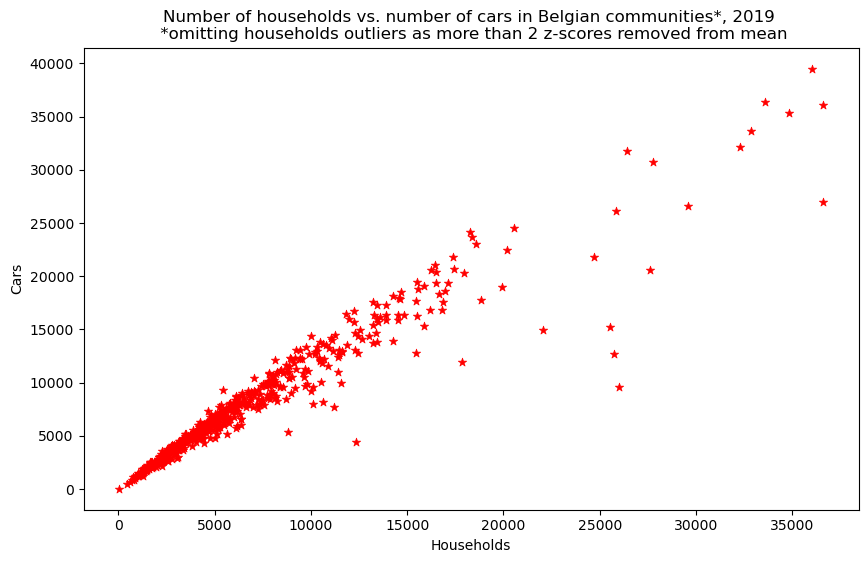

In [12]:
def df_without_outliers_using_z_scores(dataframe, based_on_column, reject_z_scores):
    dataframe['z_scores'] = dataframe[based_on_column].apply(z_score, dataframe=df[based_on_column])
    return df[np.abs(dataframe['z_scores']) < reject_z_scores]

z_scores_criterion = 2
df_without_outliers_z_scores = df_without_outliers_using_z_scores(df, 'households', z_scores_criterion)

plt.figure(figsize=(10,6))
plt.scatter(df_without_outliers_z_scores['households'], df_without_outliers_z_scores['cars'], marker='*', c='r', s=40, linewidths=0.5)
plt.xlabel("Households")
plt.ylabel("Cars")
plt.title("Number of households vs. number of cars in Belgian communities*, 2019 \n *omitting households outliers as more than "+ str(z_scores_criterion) + " z-scores removed from mean")
plt.show()
plt.close()

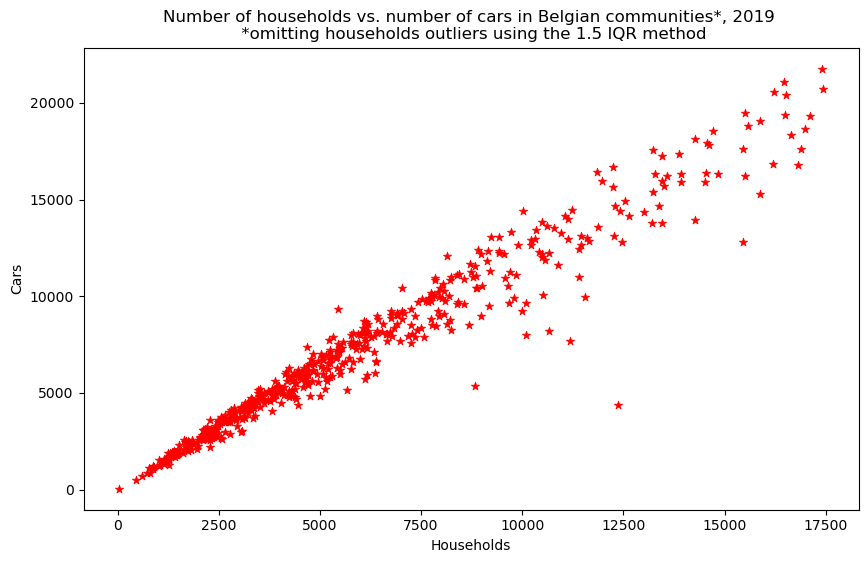

In [13]:
def df_without_outliers_using_iqr(dataframe, based_on_column):
    q1 = dataframe[based_on_column].quantile(0.25)
    q3 = dataframe[based_on_column].quantile(0.75)
    iqr = q3 - q1
    df_filter_low = dataframe[dataframe[based_on_column] > (q1 - 1.5*iqr)]
    df_filtered = df_filter_low[df_filter_low[based_on_column] < (q3 + 1.5*iqr)]
    return df_filtered

df_without_outliers_iqr = df_without_outliers_using_iqr(df, 'households')

plt.figure(figsize=(10,6))
plt.scatter(df_without_outliers_iqr['households'], df_without_outliers_iqr['cars'], marker='*', c='r', s=40, linewidths=0.5)
plt.xlabel("Households")
plt.ylabel("Cars")
plt.title("Number of households vs. number of cars in Belgian communities*, 2019 \n *omitting households outliers using the 1.5 IQR method")
plt.show()
plt.close()